<a href="https://colab.research.google.com/github/BrundaSreedhar/credit-card-fraud-detection/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial EDA

In [48]:
import pandas as pd
import numpy as np

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:")
print(df.head())
print(df.shape)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
First 5 records:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ...

In [49]:
print('Missing values:', df.isnull().sum().sum())
print('\nDtypes:\n', df.dtypes.value_counts())

Missing values: 0

Dtypes:
 float64    30
int64       1
Name: count, dtype: int64


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

It contains 284,807 credit card transactions with 31 features, including a target variable Class indicating whether a transaction is fraudulent or legitimate. Time represents the elapsed time between transactions and Amount indicates the transaction value. All features are numerical, and the dataset contains no missing values.

In [51]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [52]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0,0.998273
1,0.001727


**Core Difficulty:** Dataset is imbalanced. Based on an initial analysis, approximately 99.81% of transactions are legitimate, while only 0.18% are fraudulent. This imbalance increases the risk of developing models that appear accurate but fail to identify fraudulent activity.

In [53]:
df[['Amount', 'Class']].groupby('Class').mean()


,Amount
Class,
0,88.291022
1,122.211321


An initial comparison of transaction amounts shows that fraudulent transactions have a higher average transaction value (approximately 123) compared to legitimate transactions (approximately 90). While this suggests that transaction amount may be a useful feature for fraud detection, the overlap between classes indicates that accurate classification will require combining transaction amount with other anonymized features provided in the dataset.

In [54]:
print("\n" + "-"*80)
print("Statistical Summary:")
print("-"*80)
print(df.describe())


--------------------------------------------------------------------------------
Statistical Summary:
--------------------------------------------------------------------------------
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e

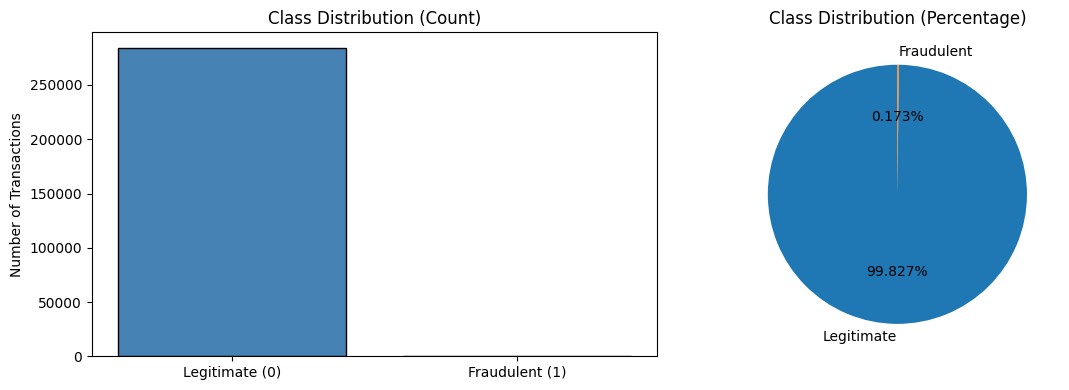

Legitimate: 284315
Fraudulent: 492
Imbalance Ratio (Legit : Fraud) = 578.0


In [55]:
import matplotlib.pyplot as plt

# Count class distribution
class_counts = df['Class'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart
axes[0].bar(['Legitimate (0)', 'Fraudulent (1)'], class_counts.values, color=['steelblue', 'crimson'], edgecolor='black')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title('Class Distribution (Count)')

# Pie chart
axes[1].pie(
    class_counts.values,
    labels=['Legitimate', 'Fraudulent'],
    autopct='%1.3f%%',
    startangle=90
)
axes[1].set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Print basic stats
print("Legitimate:", class_counts[0])
print("Fraudulent:", class_counts[1])
print("Imbalance Ratio (Legit : Fraud) =", round(class_counts[0] / class_counts[1], 0))


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

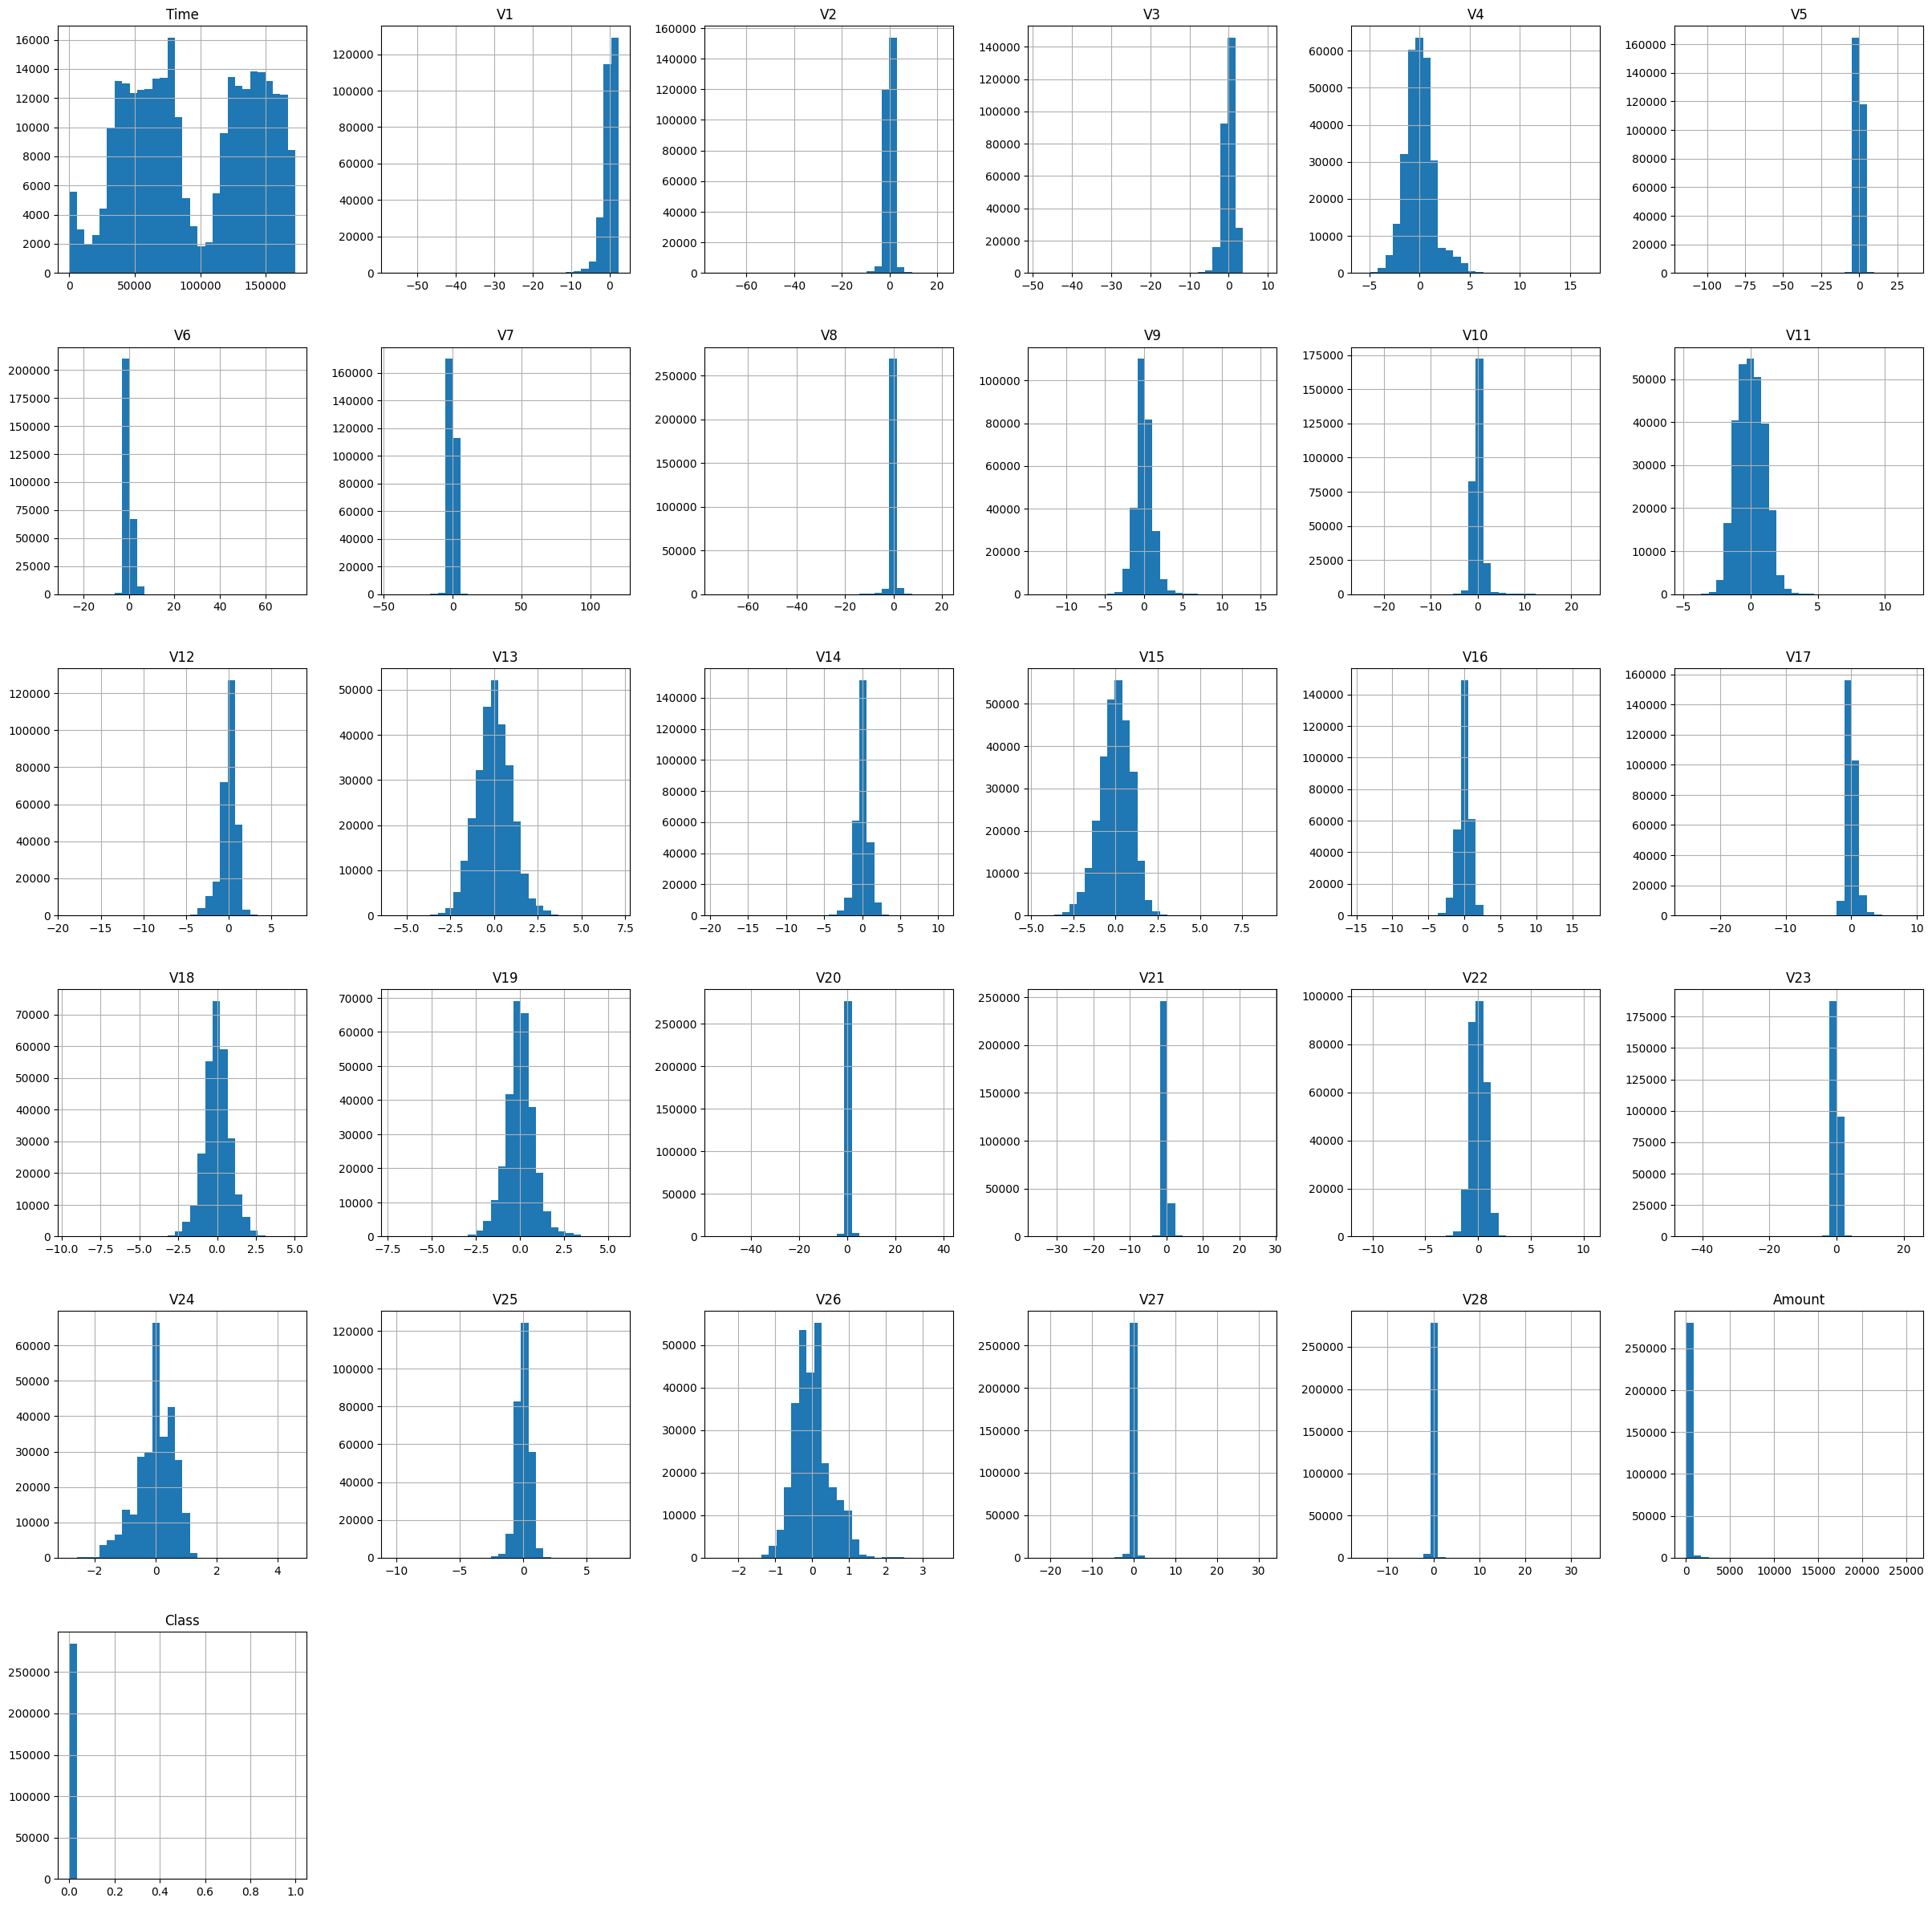

In [56]:
df.hist(bins=30, figsize=(30, 30))

Most of the other columns are roughly normally distributed around 0, which is expected as they're transformed already. Amounts are generally mostly small with some extreme values like 25000, these would be outliers. Time is a value between 0 and 172792 and its fairly distributed across the period, there are no heavy-tail outliers here. We preprocess the amount and time columns.


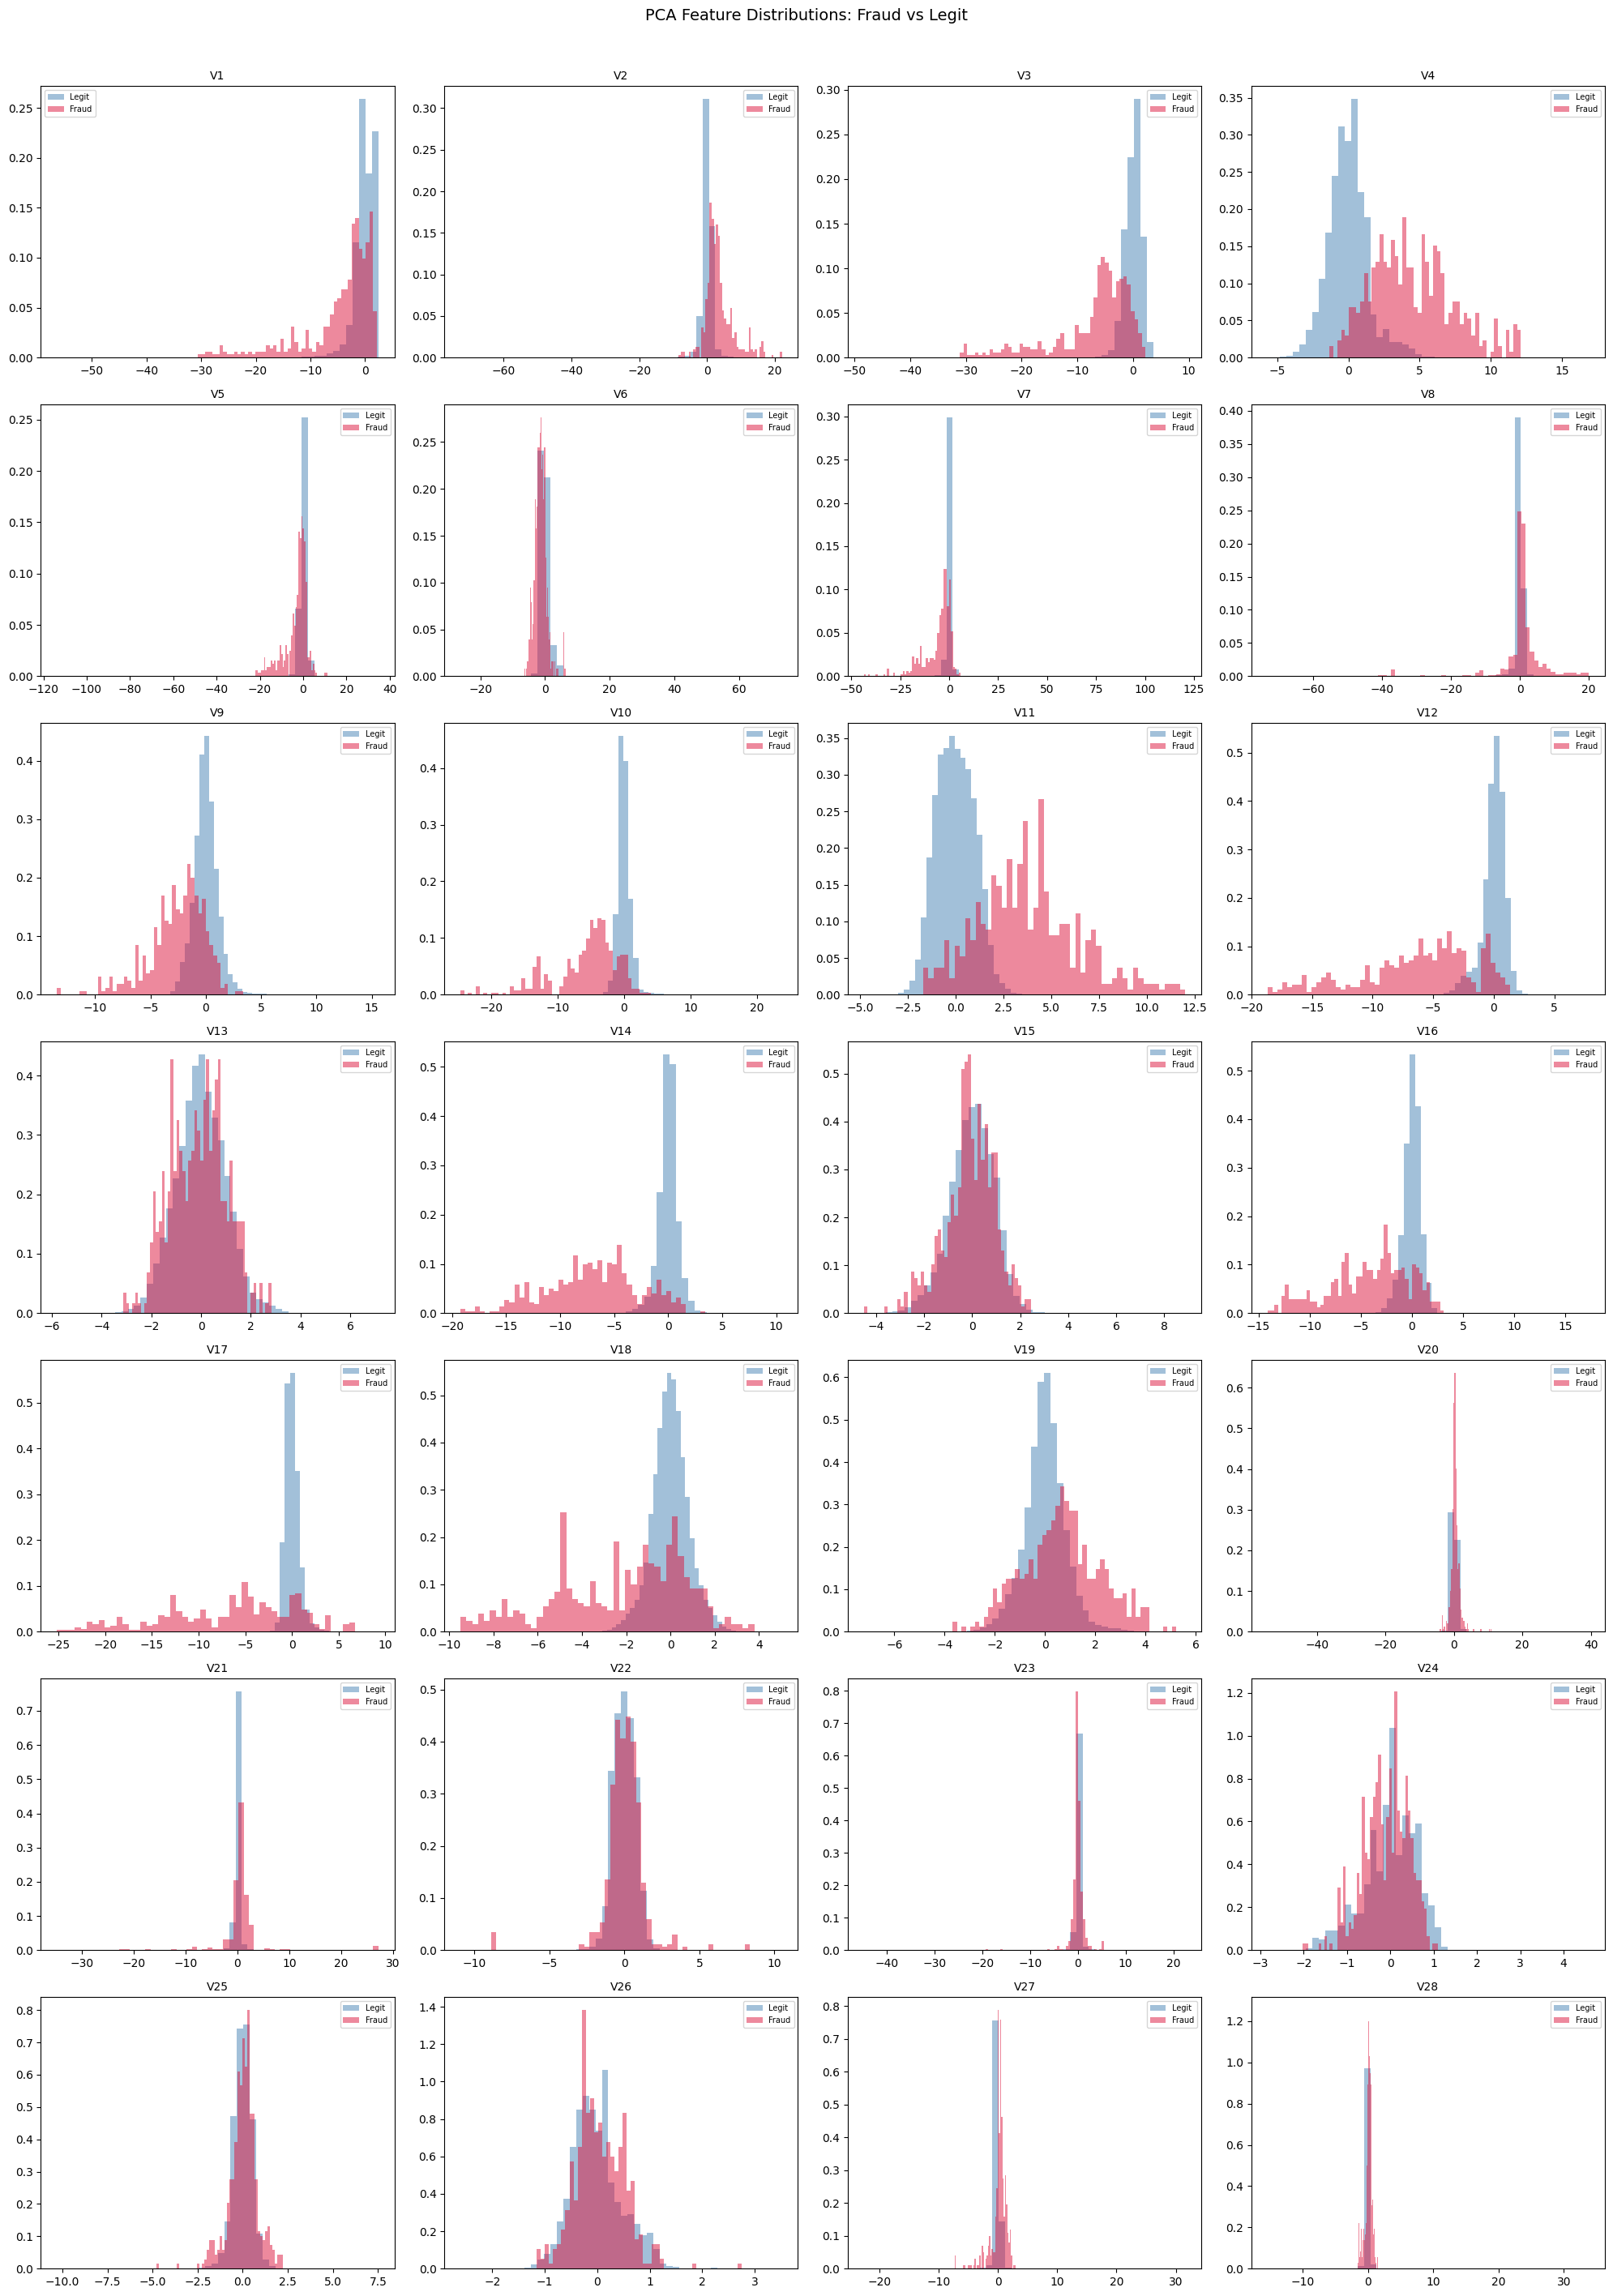

In [57]:
# --- 2.4 PCA feature distributions: fraud vs legit ---
v_features = [f'V{i}' for i in range(1, 29)]

fig, axes = plt.subplots(7, 4, figsize=(20, 28))
axes = axes.flatten()

for i, feat in enumerate(v_features):
    for label, color, name in [(0, 'steelblue', 'Legit'), (1, 'crimson', 'Fraud')]:
        axes[i].hist(df[df['Class']==label][feat], bins=50, alpha=0.5,
                     color=color, label=name, density=True)
    axes[i].set_title(feat, fontsize=10)
    axes[i].legend(fontsize=7)

plt.suptitle('PCA Feature Distributions: Fraud vs Legit', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

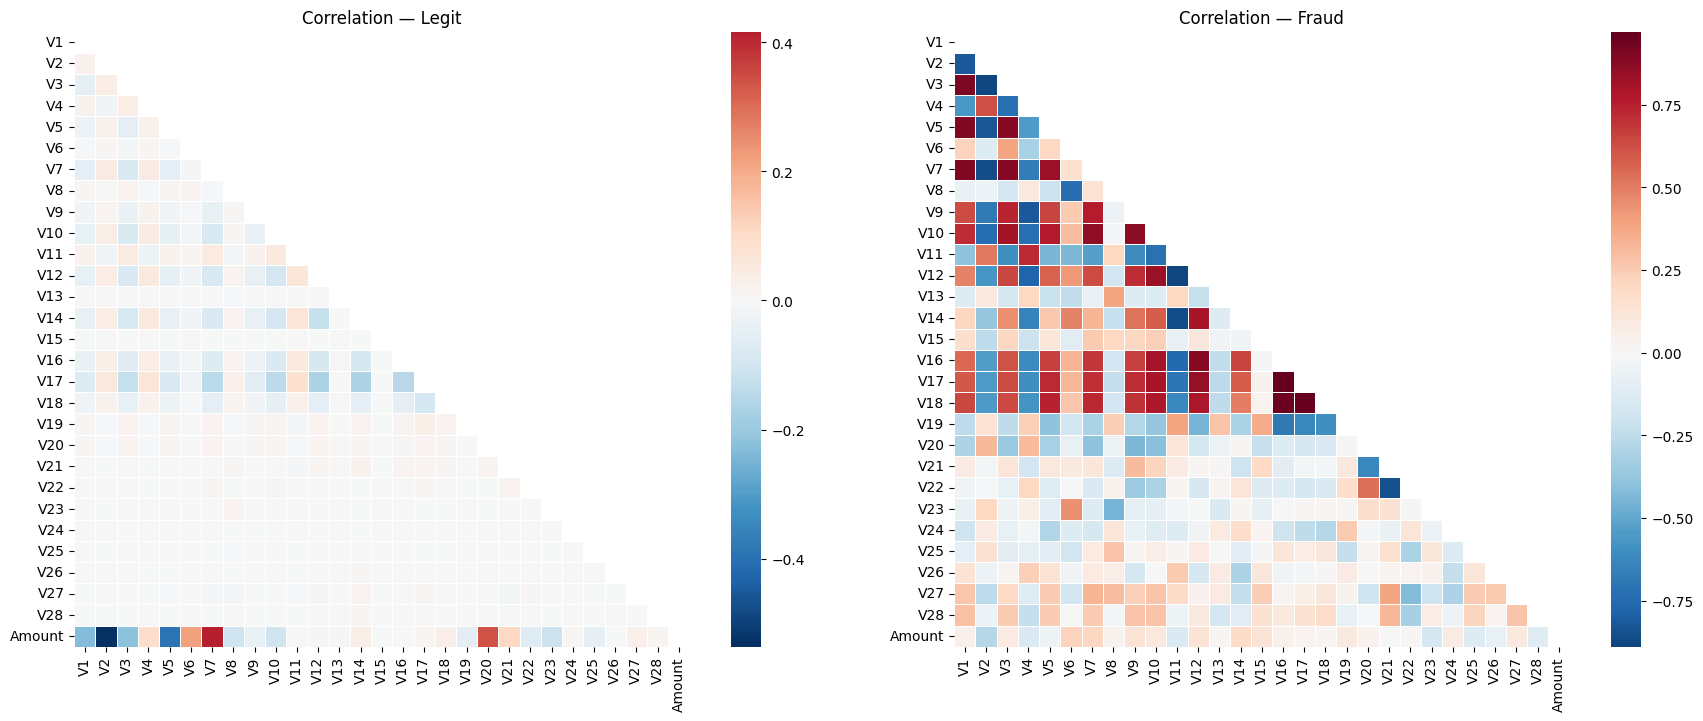

In [58]:
# --- 2.5 Correlation heatmap (fraud transactions only) ---
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for ax, label, title in [(axes[0], 0, 'Correlation — Legit'), (axes[1], 1, 'Correlation — Fraud')]:
    corr = df[df['Class']==label][v_features + ['Amount']].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, ax=ax, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, annot=False, fmt='.1f')
    ax.set_title(title, fontsize=12)

plt.tight_layout()
plt.show()

Naive, fast and model-free check of what could potentially be imporatnt features. This does not consider variance or correlations between features but might give us some intuition on which variables might influence why specific transactions were flagged as fraud.

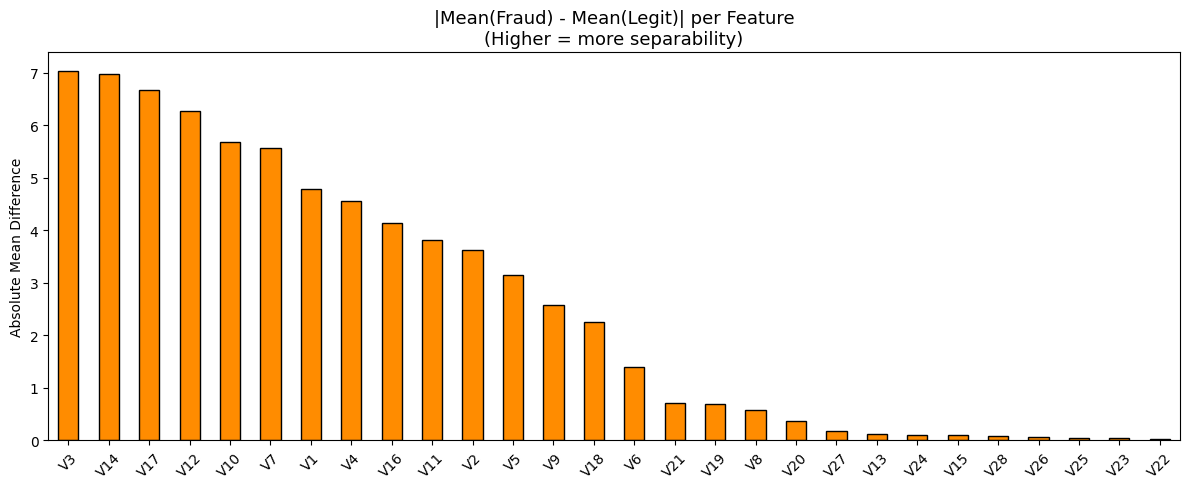

Top 10 most separating features:
V3     7.045452
V14    6.983787
V17    6.677371
V12    6.270225
V10    5.686707
V7     5.578368
V1     4.780206
V4     4.549889
V16    4.147110
V11    3.806749
dtype: float64


In [59]:
# --- 2.6 Feature importance preview: mean absolute difference between classes ---
fraud = df[df['Class']==1][v_features].mean()
legit = df[df['Class']==0][v_features].mean()
diff = (fraud - legit).abs().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
diff.plot(kind='bar', color='darkorange', edgecolor='black')
plt.title('|Mean(Fraud) - Mean(Legit)| per Feature\n(Higher = more separability)', fontsize=13)
plt.ylabel('Absolute Mean Difference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Top 10 most separating features:')
print(diff.head(10))

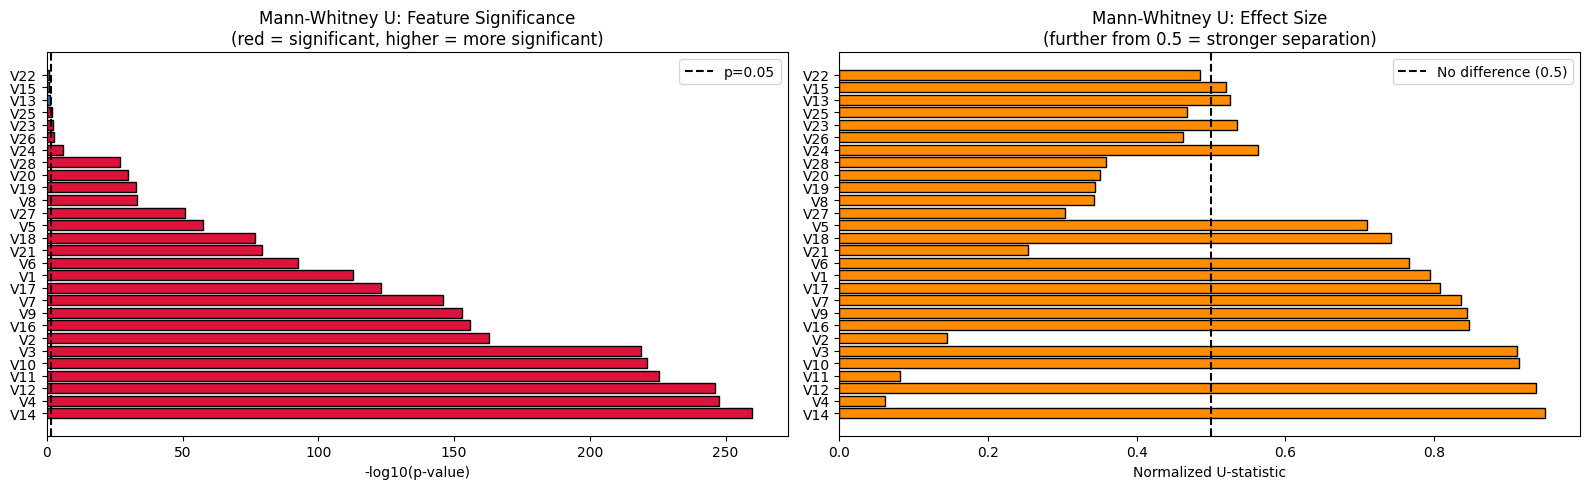

In [60]:
from scipy.stats import mannwhitneyu

results = {}
for feat in v_features:
    stat, p = mannwhitneyu(
        df[df['Class']==0][feat],
        df[df['Class']==1][feat],
        alternative='two-sided'
    )
    results[feat] = {'stat': stat, 'p_value': p}

results_df = pd.DataFrame(results).T
results_df['-log10(p)'] = -np.log10(results_df['p_value'])
results_df = results_df.sort_values('-log10(p)', ascending=False)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# --- Left: -log10(p-value) ---
colors = ['crimson' if p < 0.05 else 'steelblue' for p in results_df['p_value']]
axes[0].barh(results_df.index, results_df['-log10(p)'], color=colors, edgecolor='black')
axes[0].axvline(-np.log10(0.05), color='black', linestyle='--', label='p=0.05')
axes[0].set_xlabel('-log10(p-value)')
axes[0].set_title('Mann-Whitney U: Feature Significance\n(red = significant, higher = more significant)')
axes[0].legend()

# --- Right: U-statistic (normalized) ---
n0 = (df['Class']==0).sum()
n1 = (df['Class']==1).sum()
results_df['U_norm'] = results_df['stat'] / (n0 * n1)  # ranges 0-1, 0.5 = no difference
axes[1].barh(results_df.index, results_df['U_norm'], color='darkorange', edgecolor='black')
axes[1].axvline(0.5, color='black', linestyle='--', label='No difference (0.5)')
axes[1].set_xlabel('Normalized U-statistic')
axes[1].set_title('Mann-Whitney U: Effect Size\n(further from 0.5 = stronger separation)')
axes[1].legend()

plt.tight_layout()
plt.show()


Left (-log10 p-value): which features are statistically different between fraud and legit. Almost all V features will be significant given the dataset size, so this alone isn't enough.


Right (normalized U-statistic): the *effect size*, which is more meaningful here. It's essentially the probability that a random fraud transaction scores higher than a random legit one on that feature. Values near 0 or 1 mean strong separation; 0.5 means the feature is useless for discrimination.
The right plot is helpful rank features by - significance without effect size is misleading with large datasets because even tiny, meaningless differences become statistically significant.

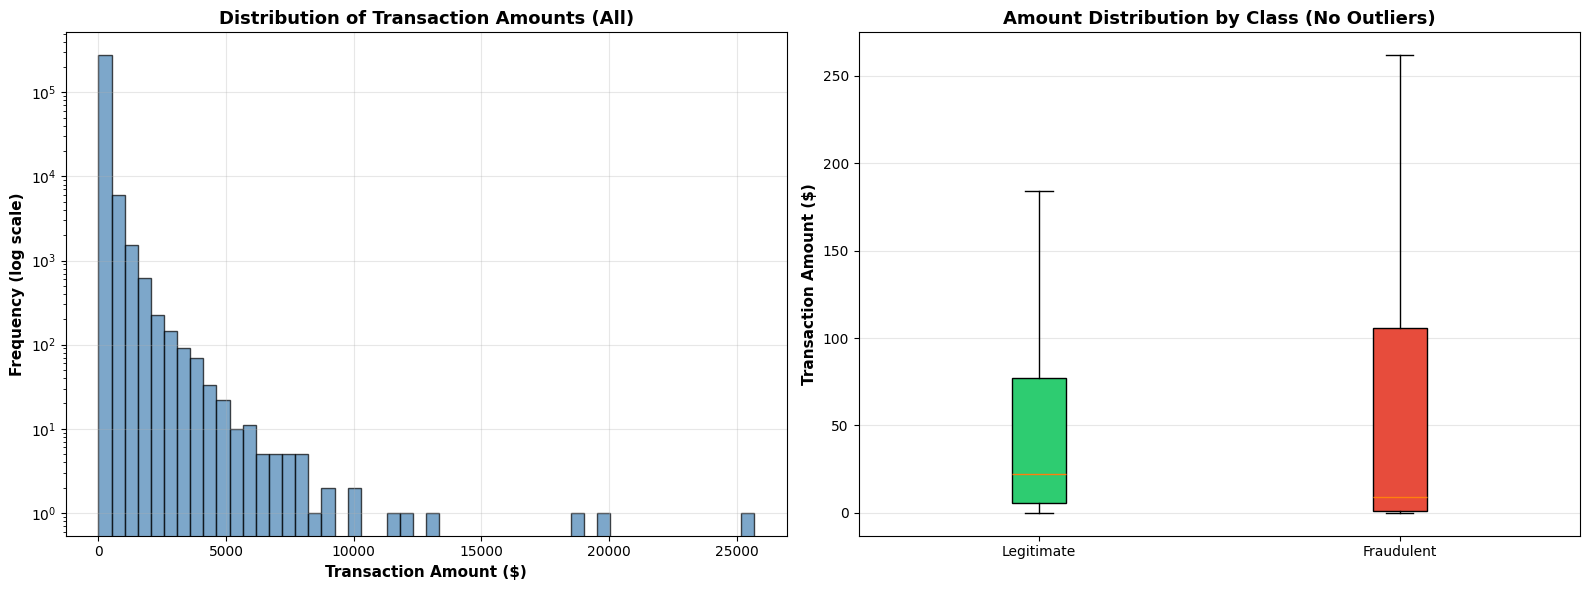

TRANSACTION AMOUNT STATISTICS
Overall - Mean: $88.35, Median: $22.00
Legitimate - Mean: $88.29, Median: $22.00
Fraudulent - Mean: $122.21, Median: $9.25


In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Changed to 1 row, 2 columns, and adjusted figsize

# Overall Amount Distribution (with log scale for better visibility)
axes[0].hist(df['Amount'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Transaction Amount ($)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency (log scale)', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Transaction Amounts (All)', fontsize=13, fontweight='bold')
axes[0].set_yscale('log')
axes[0].grid(alpha=0.3)
df_legit=df[df['Class']==0]
df_fraud=df[df['Class']==1]

# Amount Distribution by Class
# Box plot comparison
box_data = [df_legit['Amount'], df_fraud['Amount']]
bp = axes[1].boxplot(box_data, tick_labels=['Legitimate', 'Fraudulent'],
                         patch_artist=True, showfliers=False)
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')
axes[1].set_ylabel('Transaction Amount ($)', fontsize=11, fontweight='bold')
axes[1].set_title('Amount Distribution by Class (No Outliers)', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('02_amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print("="*80)
print("TRANSACTION AMOUNT STATISTICS")
print("="*80)
print(f"Overall - Mean: ${df['Amount'].mean():.2f}, Median: ${df['Amount'].median():.2f}")
print(f"Legitimate - Mean: ${df_legit['Amount'].mean():.2f}, Median: ${df_legit['Amount'].median():.2f}")
print(f"Fraudulent - Mean: ${df_fraud['Amount'].mean():.2f}, Median: ${df_fraud['Amount'].median():.2f}")
print("="*80)

The transaction amount distribution is highly right-skewed, as shown by the histogram on a log scale, indicating that most transactions involve small amounts while a few very large transactions occur infrequently. When comparing transaction amounts by class using the box plot (with outliers removed), fraudulent transactions tend to have a lower median amount than legitimate ones, even though their mean is higher due to the presence of some high-value fraud cases. This suggests that fraud commonly occurs at smaller transaction amounts, possibly to avoid detection, while occasional large fraudulent transactions significantly increase the average.

/tmp/ipython-input-893449590.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_time = df.groupby(time_bins)['Class'].agg(['mean', 'count'])


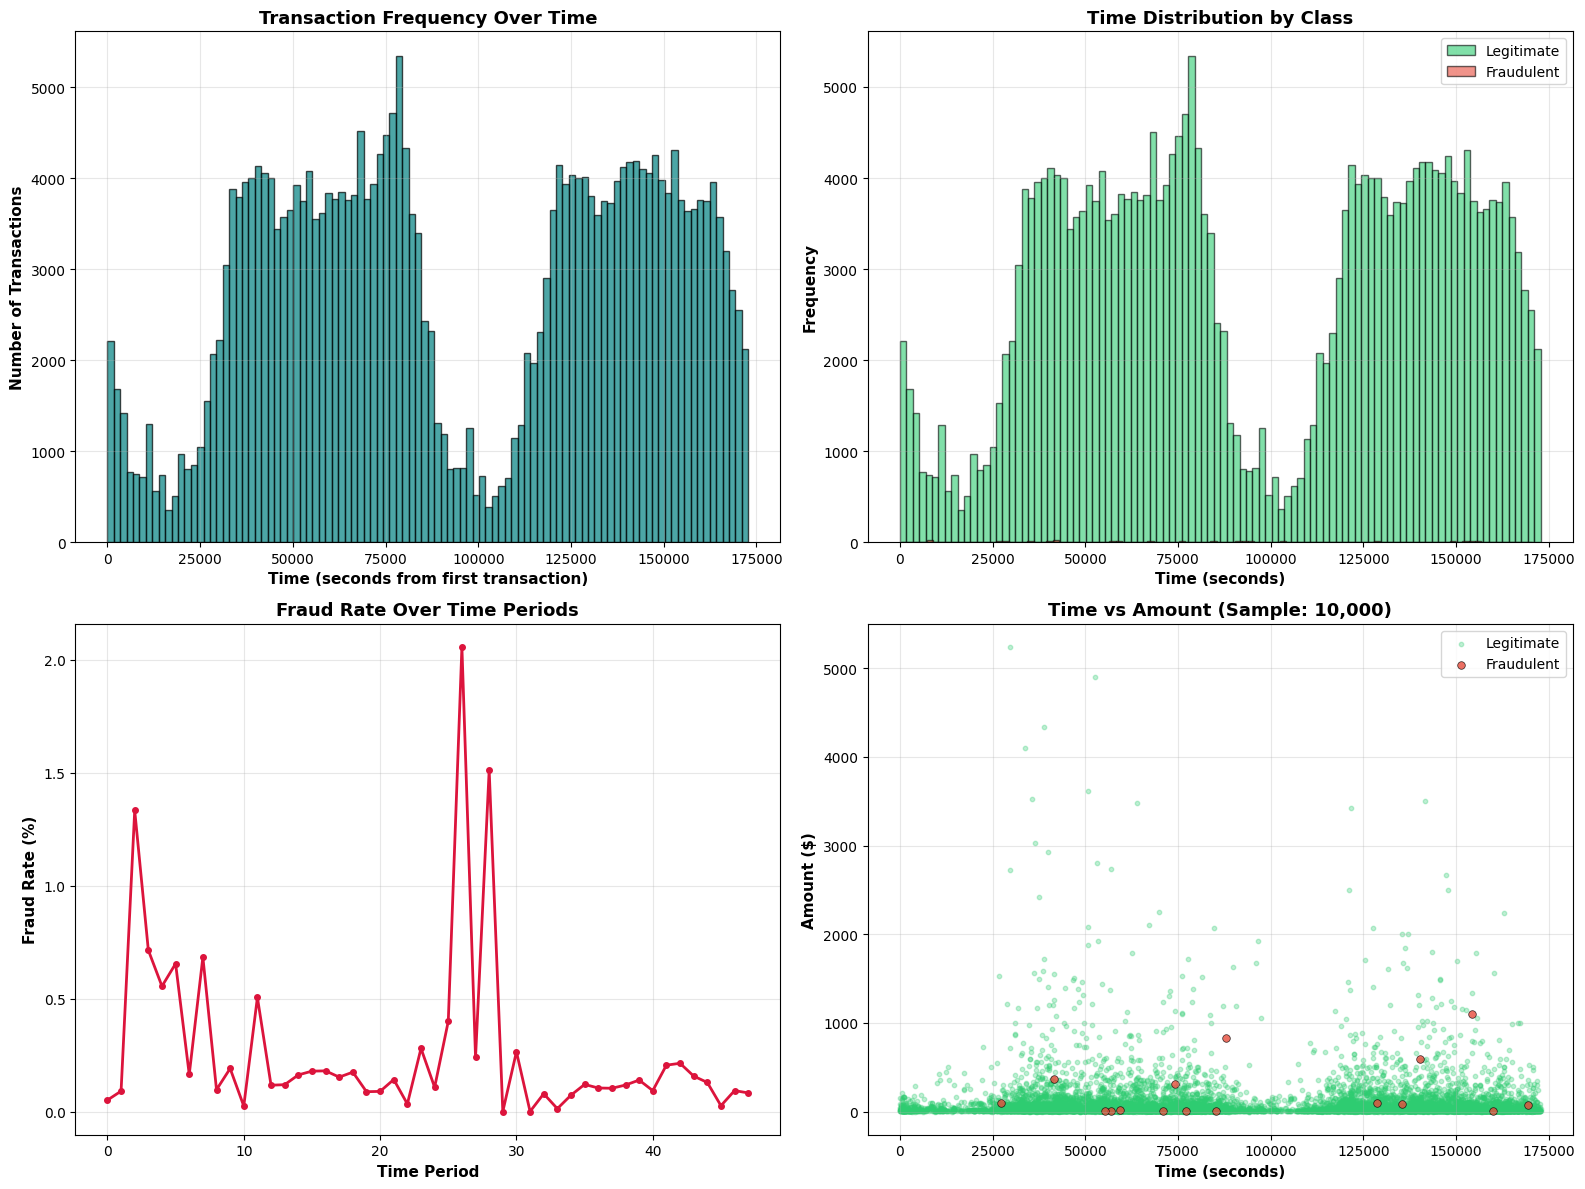

 Time distribution analysis complete!


In [62]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Transaction frequency over time
axes[0, 0].hist(df['Time'], bins=100, color='teal', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Time (seconds from first transaction)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Number of Transactions', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Transaction Frequency Over Time', fontsize=13, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Time distribution by class
axes[0, 1].hist(df_legit['Time'], bins=100, alpha=0.6, label='Legitimate',
                color='#2ecc71', edgecolor='black')
axes[0, 1].hist(df_fraud['Time'], bins=100, alpha=0.6, label='Fraudulent',
                color='#e74c3c', edgecolor='black')
axes[0, 1].set_xlabel('Time (seconds)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Time Distribution by Class', fontsize=13, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(alpha=0.3)

# Fraud rate over time periods
time_bins = pd.cut(df['Time'], bins=48)
fraud_rate_time = df.groupby(time_bins)['Class'].agg(['mean', 'count'])
fraud_rate_time['fraud_pct'] = fraud_rate_time['mean'] * 100

axes[1, 0].plot(range(len(fraud_rate_time)), fraud_rate_time['fraud_pct'],
                marker='o', linewidth=2, markersize=4, color='crimson')
axes[1, 0].set_xlabel('Time Period', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Fraud Rate (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Fraud Rate Over Time Periods', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Scatter: Time vs Amount (sample for clarity)
sample_size = min(10000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)
scatter_legit = df_sample[df_sample['Class'] == 0]
scatter_fraud = df_sample[df_sample['Class'] == 1]

axes[1, 1].scatter(scatter_legit['Time'], scatter_legit['Amount'],
                   alpha=0.3, s=10, c='#2ecc71', label='Legitimate')
axes[1, 1].scatter(scatter_fraud['Time'], scatter_fraud['Amount'],
                   alpha=0.8, s=30, c='#e74c3c', label='Fraudulent',
                   edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('Time (seconds)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Amount ($)', fontsize=11, fontweight='bold')
axes[1, 1].set_title(f'Time vs Amount (Sample: {sample_size:,})', fontsize=13, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('03_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Time distribution analysis complete!")

The time-based visualizations reveal meaningful patterns in transaction behavior and fraud occurrence. Overall transaction frequency is not uniform across time, showing distinct peaks and low-activity periods, which suggests cyclic usage patterns. When comparing time distributions by class, fraudulent transactions broadly follow the same temporal structure as legitimate ones, indicating that fraud does not occur only at specific times but blends into normal activity. However, the fraud rate over time highlights certain periods with noticeable spikes, where the proportion of fraudulent transactions increases despite lower transaction counts. This suggests that fraud risk varies across time windows rather than volume alone. Additionally, the Time vs Amount scatter plot shows that fraudulent transactions tend to cluster at lower amounts but occasionally appear as higher-value outliers, reinforcing the need to consider time-based patterns alongside transaction amounts when detecting fraud.

#Data Preprocessing


<Axes: >

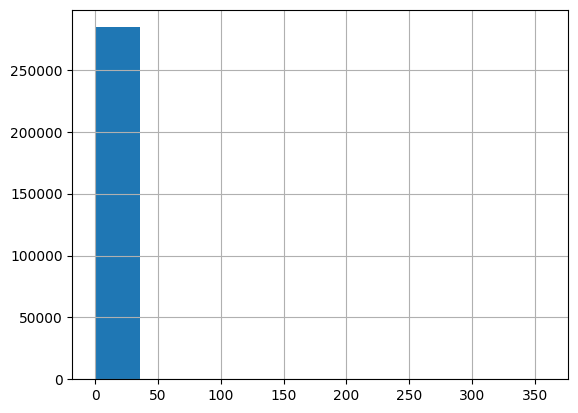

In [63]:
#Amount ranges from 0 to 25691.160000

from sklearn.preprocessing import RobustScaler, StandardScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
new_df['Amount'].hist()

In [64]:
new_df['Amount'].describe()

,Amount
count,284807.000000
mean,0.927124
std,3.495006
min,-0.307413
25%,-0.229162
50%,0.000000
75%,0.770838
max,358.683155


We now have a much smaller standard deviation, there are still outliers but its much better than what we had previously


We'll just standardize Time since we dont seem to have any outliers

In [65]:
time = new_df['Time']
#standard scaler
new_df['Time'] = StandardScaler().fit_transform(new_df[['Time']])
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [66]:
new_df = new_df.sample(frac=1, random_state=42)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,-1.122574,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,4.781527,1
49906,-1.064538,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,6.960386,0
29474,-1.249364,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0.125760,0
276481,1.522680,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.286453,0
278846,1.551109,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.294977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.404225,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,-0.279746,0
259178,1.351627,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,0.939426,0
131932,-0.316266,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,-0.252358,0
146867,-0.144939,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,-0.293440,0


In [70]:
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()


(Class
 0    239591
 1       409
 Name: count, dtype: int64,
 Class
 0    21956
 1       44
 Name: count, dtype: int64,
 Class
 0    22768
 1       39
 Name: count, dtype: int64)

Convert these into numpy arrays

In [71]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [75]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]

x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

Modelling

In [76]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

0.9992541666666667

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Legit', 'Fraud']))

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     22768
       Fraud       0.93      0.64      0.76        39

    accuracy                           1.00     22807
   macro avg       0.96      0.82      0.88     22807
weighted avg       1.00      1.00      1.00     22807



precisison here helps us understand the number of false positives. (Calling it a fraud when it wasnt a fraud)
higher prec -> we dint flag real transactions


Recall measures false negatives. it was fraud but we predicted not fraud. -> the model didnt predict that. Recall is important cause we want to catch the fraudulent transactions.

Accuracy -> is it 100% accurate? no, we focus on the precision and recall. because of the imbalance in the dataset. accuracy is accurate if it was balanced.

#Random Forest

In [107]:
#Random forest to test the data
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
random_forest.score(x_train, y_train)

print(classification_report(y_val, random_forest.predict(x_val), target_names=['Legit', 'Fraud']))

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     22768
       Fraud       1.00      0.82      0.90        39

    accuracy                           1.00     22807
   macro avg       1.00      0.91      0.95     22807
weighted avg       1.00      1.00      1.00     22807



#NEURAL NETWORK - CHECK AGAIN!!!

In [100]:
import tensorflow as tf
import keras
from keras import layers, callbacks

# --- Class weight to handle imbalance ---

shallow_nn = keras.models.Sequential()
shallow_nn.add(layers.InputLayer(shape=(x_train.shape[1],)))
shallow_nn.add(layers.Dense(2, activation='relu'))
shallow_nn.add(layers.BatchNormalization())
shallow_nn.add(layers.Dense(1, activation='sigmoid'))

neg, pos = np.bincount(y_train.astype(int))
class_weight = {0: 1.0, 1: neg / pos}

early_stop = callbacks.EarlyStopping(
    monitor='val_auc', patience=10,
    mode='max', restore_best_weights=True
)


checkpoint = callbacks.ModelCheckpoint(
    'shallow_nn.keras',                              # fix: needs .keras extension
    monitor='val_auc',                               # fix: monitor AUC not loss
    save_best_only=True,
    mode='max'                                       # fix: higher AUC = better
)

shallow_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=[
        keras.metrics.AUC(name='auc', curve='PR')])
shallow_nn.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 2)              │            62 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [101]:
history = shallow_nn.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,          # let early stopping decide when to quit
    batch_size=2048,     # larger batches = faster epochs, more stable gradients
    class_weight=class_weight,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - auc: 0.0064 - loss: 1.2342 - val_auc: 0.0075 - val_loss: 0.5883
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc: 0.0074 - loss: 1.1597 - val_auc: 0.0096 - val_loss: 0.5969
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.0093 - loss: 1.0943 - val_auc: 0.0128 - val_loss: 0.5737
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.0132 - loss: 1.0097 - val_auc: 0.0174 - val_loss: 0.5270
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.0174 - loss: 0.8969 - val_auc: 0.0258 - val_loss: 0.4574
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.0242 - loss: 0.8250 - val_auc: 0.0361 - val_loss: 0.3939
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.0419 - loss: 0.6936 - val_auc: 0.0517 - val_loss: 0.3411
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.0493 - loss: 0.5721 - val_auc: 0.0682 - val_loss: 0.2935
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/

In [105]:
y_pred = (shallow_nn.predict(x_val).flatten() >= 0.5).astype(int)
print(classification_report(y_val, y_pred, target_names=['Legit', 'Fraud']))

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

       Legit       1.00      0.98      0.99     22768
       Fraud       0.07      1.00      0.13        39

    accuracy                           0.98     22807
   macro avg       0.53      0.99      0.56     22807
weighted avg       1.00      0.98      0.99     22807



#Handling the extreme class imbalance